In [1]:
import torch
import matplotlib.pyplot as plt
import sys
from neuralop.models import FNO
from neuralop import Trainer
from neuralop.training import AdamW
from neuralop.data.datasets import load_darcy_flow_small
from neuralop.utils import count_model_params
from neuralop import LpLoss, H1Loss
device = 'cpu'


# %%
# Loading the Navier-Stokes dataset 
train_loader, test_loaders, data_processor = load_darcy_flow_small(
        n_train=1000, batch_size=32, 
        test_resolutions=[16, 32], n_tests=[100, 50],
        test_batch_sizes=[32, 32],
)

Loading test db for resolution 16 with 100 samples 
Loading test db for resolution 32 with 50 samples 


In [2]:
batch = next(iter(train_loader))
x, y= batch['x'],batch['y']
x.shape

torch.Size([32, 1, 16, 16])

In [3]:
pbatch = data_processor.preprocess(batch)
px, py = pbatch['x'], pbatch['y']


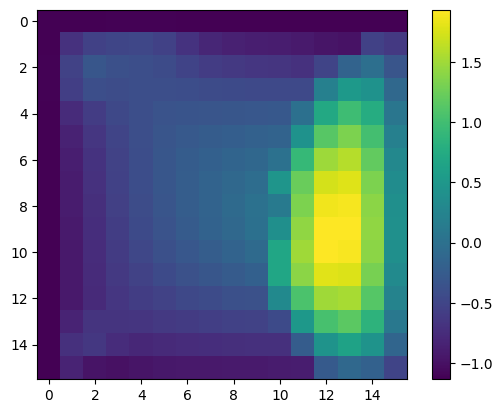

In [4]:
plt.imshow(py[10, 0])
plt.colorbar()
plt.show()

In [5]:
x.shape, y.shape

(torch.Size([32, 1, 16, 16]), torch.Size([32, 1, 16, 16]))

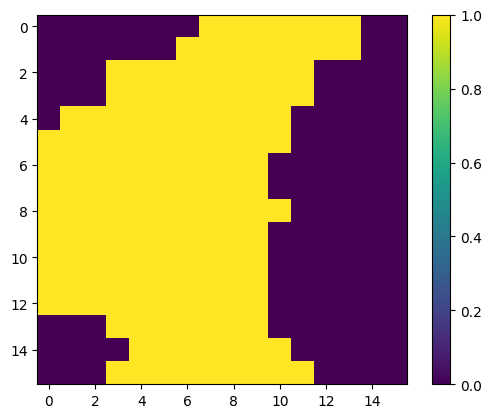

In [6]:
plt.imshow(x[10, 0])
plt.colorbar()
plt.show()

In [7]:

model = FNO(n_modes=(16, 16),
             in_channels=1, 
             out_channels=1, 
             hidden_channels=32, 
             projection_channel_ratio=2, 
             factorization='tucker', 
             rank=0.42)

In [8]:
batch = next(iter(train_loader))

batch['x'].shape, batch['y'].shape
batch['x'].dtype, batch['y'].dtype

# %%
# Training the FNO model on the Navier-Stokes dataset


(torch.float32, torch.float32)

In [32]:
from turbencrypt.FNO import FourierNO
data_path = "/Users/gilpinlab/turbulence_encryption/data/initconds_test.npz"
random_state = 42
test_size = .2
device = 'cpu'
train_loader, test_loader = FourierNO.makeFNO(data_path, random_state, test_size)


In [33]:
batch = next(iter(train_loader))
print(data_processor.in_normalizer, data_processor.out_normalizer)
py = data_processor.out_normalizer(batch['y'])
x = batch['x']
y = batch['y']

None UnitGaussianNormalizer()


In [34]:
y.shape

torch.Size([4, 1, 64, 64])

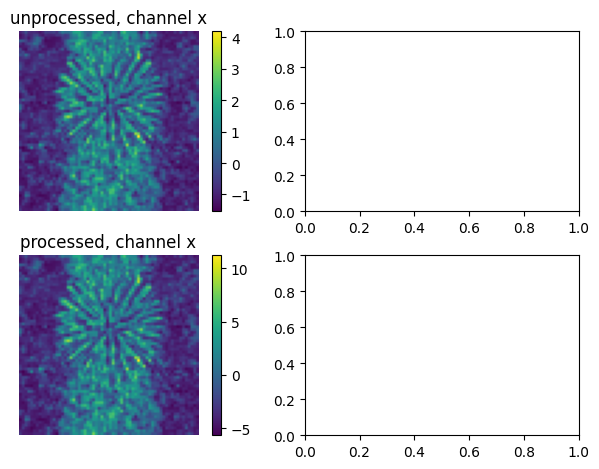

In [35]:
fig, axes = plt.subplots(2,2)
idx = 3
for i, channels in enumerate([y[idx], py[idx]]):
    for j in range(1):
        img = axes[i,j].imshow(channels[j])
        # add colorbar
        cbar = fig.colorbar(img, ax=axes[i,j])
        axes[i,j].set_title(f"{'processed' if i == 1 else 'unprocessed'}, channel {'x' if j == 0 else 'y'}")
        axes[i,j].axis('off')
    
fig.tight_layout()
plt.show()

In [33]:
sum(x.isnan())

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])